<a href="https://colab.research.google.com/github/ithingv/nlp_study/blob/main/character_level_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [2]:
import os
import glob

data_path = "/content/MyDrive/MyDrive/torch_nlp_tutorial/data"
os.listdir(data_path )

['eng-fra.txt', 'names']

In [3]:
os.listdir(os.path.join(data_path, "names"))

['Czech.txt',
 'Greek.txt',
 'Polish.txt',
 'Dutch.txt',
 'Portuguese.txt',
 'Chinese.txt',
 'Scottish.txt',
 'German.txt',
 'Japanese.txt',
 'Spanish.txt',
 'French.txt',
 'English.txt',
 'Russian.txt',
 'Korean.txt',
 'Irish.txt',
 'Italian.txt',
 'Arabic.txt',
 'Vietnamese.txt']

In [4]:
def findFiles(path): return glob.glob(path)

In [5]:
findFiles(data_path +'/names/*.txt')

['/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Czech.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Greek.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Polish.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Dutch.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Portuguese.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Chinese.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Scottish.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/German.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Japanese.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Spanish.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/French.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/English.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Russian.txt',
 '/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Korean.txt',
 '/content/

In [6]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [7]:
all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [8]:
# Turn a Unicode string to plain ASCII
# https://stackoverflow.com/a/518232/2809427

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [9]:
unicodeToAscii('Ślusàrski')

'Slusarski'

In [10]:
unicodedata.normalize('NFD', 'Ślusàrski')

'Ślusàrski'

In [11]:
# Build the category_lines dictionary, a list of names per language

category_lines = {}
all_categories = []

# Read a file and split into lines

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [12]:
for filename in findFiles('/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    print(filename)
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Czech.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Greek.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Polish.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Dutch.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Portuguese.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Chinese.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Scottish.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/German.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Japanese.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Spanish.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/French.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/English.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Russian.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Korean.txt
/content/MyDrive/MyDrive/torch_nlp_tutorial/data/names/Irish.txt
/c

In [13]:
print(category_lines['Korean'][:5])

['Ahn', 'Baik', 'Bang', 'Byon', 'Cha']


In [14]:
print(category_lines['Japanese'][-5:])

['Yoshizaki', 'Yoshizawa', 'Yuasa', 'Yuhara', 'Yunokawa']


# Turning Names into Tensors

Tensor shape : [line_length , 1, n_letters]

In [15]:
all_categories

['Czech',
 'Greek',
 'Polish',
 'Dutch',
 'Portuguese',
 'Chinese',
 'Scottish',
 'German',
 'Japanese',
 'Spanish',
 'French',
 'English',
 'Russian',
 'Korean',
 'Irish',
 'Italian',
 'Arabic',
 'Vietnamese']

In [16]:
import torch

def letterToIdx(letter):
    return all_letters.find(letter)

In [17]:
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    letter_idx = letterToIdx(letter)
    tensor[0][letter_idx] = 1
    return tensor

In [18]:
# Turn a line into <line_length x 1 x n_letters>

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for line_idx, letter in enumerate(line):
        tensor[line_idx][0][letterToIdx(letter)] = 1
    return tensor 

In [19]:
print(lineToTensor('abc'))

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])


In [20]:
input_size = n_letters
hidden_size = 128
output_size = len(all_categories)

In [21]:
print(input_size, hidden_size, output_size)

57 128 18


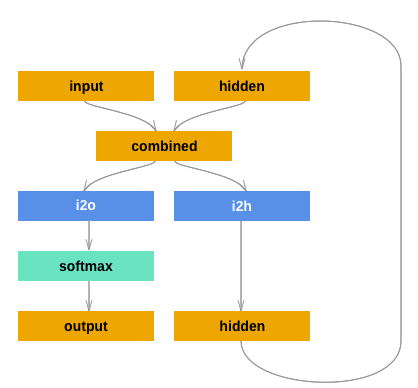

In [22]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
rnn = RNN(input_size, hidden_size, output_size) # 57 128 18

In [23]:
input = letterToTensor('A')

hidden = torch.zeros(1, 128)

output, next_hidden =  rnn(input, hidden)
print(output)

tensor([[-2.9107, -2.8152, -2.7781, -2.8803, -2.9480, -2.9551, -2.8740, -2.7567,
         -2.9715, -2.9281, -2.8502, -2.8139, -2.9988, -2.8550, -2.9840, -2.8779,
         -2.9542, -2.9186]], grad_fn=<LogSoftmaxBackward0>)


For the sake of efficiency we don’t want to be creating a new Tensor for every step, so we will use lineToTensor instead of letterToTensor and use slices. This could be further optimized by pre-computing batches of Tensors.

In [25]:
input = lineToTensor('ABCDE')

output, next_hidden = rnn(input[1], hidden)
print(output)

tensor([[-2.9158, -2.8854, -2.7986, -2.8088, -2.9285, -2.9400, -2.9385, -2.8239,
         -2.9710, -2.8315, -2.7637, -2.8867, -2.9359, -2.8269, -2.9068, -2.9344,
         -2.9631, -3.0073]], grad_fn=<LogSoftmaxBackward0>)


In [26]:
# Tensor.topk to get the index of the greatest value:
output.topk(1)

torch.return_types.topk(values=tensor([[-2.7637]], grad_fn=<TopkBackward0>), indices=tensor([[10]]))

In [27]:
torch.argmax(output)

tensor(10)

# Training
Preparing for Training

In [28]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    print(category_i)
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

10
('French', 10)


In [29]:
import random

def randomChoice(lst):
    return lst[random.randint(0, len(lst) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

In [30]:
category_lines['Korean'][:5]

['Ahn', 'Baik', 'Bang', 'Byon', 'Cha']

In [31]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = English / line = Wrigglesworth
category = Chinese / line = Bui
category = Spanish / line = Barros
category = German / line = Kunkle
category = Spanish / line = Aiza
category = English / line = Symes
category = Greek / line = Adamidis
category = Italian / line = Portoghese
category = Irish / line = Aonghuis
category = English / line = Herron


In [32]:
category = 'Italian'
torch.tensor([all_categories.index(category)], dtype=torch.long)

tensor([15])

In [33]:
print(line_tensor.size()) # Battaglia

torch.Size([6, 1, 57])


# Training the Network

For the loss function nn.NLLLoss is appropriate, since the last layer of the RNN is nn.LogSoftmax.


Each loop of training will:

- Create input and target tensors
- Create a zeroed initial hidden state
- Read each letter in and
- Keep hidden state for next letter
- Compare final output to target
- Back-propagate
- Return the output and loss

In [34]:
criterion = nn.NLLLoss()

In [35]:
lr = 5e-3 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):

    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]): # line_length
        output, hidden = rnn(line_tensor[i],hidden) # i_th one hot vector [1, 57]

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha =- lr)

    return output, loss.item()

In [36]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 5000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
    
    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

12
5000 5% (0m 4s) 2.9352 Murphy / Russian ✗ (Scottish)
16
10000 10% (0m 9s) 1.9324 Sherak / Arabic ✗ (Czech)
15
15000 15% (0m 13s) 2.7360 Silje / Italian ✗ (Dutch)
15
20000 20% (0m 18s) 3.0413 Canne / Italian ✗ (Dutch)
15
25000 25% (0m 23s) 0.4885 Buonarroti / Italian ✓
12
30000 30% (0m 27s) 1.2279 Nurgaliev / Russian ✓
4
35000 35% (0m 32s) 1.3518 Barros / Portuguese ✓
10
40000 40% (0m 37s) 2.2417 Embleton / French ✗ (English)
7
45000 45% (0m 41s) 2.4877 Seger / German ✗ (Czech)
4
50000 50% (0m 46s) 1.1194 Gomes / Portuguese ✓
6
55000 55% (0m 50s) 0.1899 Watson / Scottish ✓
4
60000 60% (0m 55s) 1.4054 Smets / Portuguese ✗ (Dutch)
15
65000 65% (1m 0s) 1.8401 Del olmo / Italian ✗ (Spanish)
13
70000 70% (1m 5s) 0.9499 Moon / Korean ✓
2
75000 75% (1m 10s) 1.5460 Cermak / Polish ✗ (Czech)
3
80000 80% (1m 15s) 1.5819 Karl / Dutch ✓
15
85000 85% (1m 19s) 0.7760 Zunino / Italian ✓
4
90000 90% (1m 24s) 1.7571 Sarto / Portuguese ✗ (Italian)
2
95000 95% (1m 29s) 0.0302 Kedzierski / Polish ✓
16
1

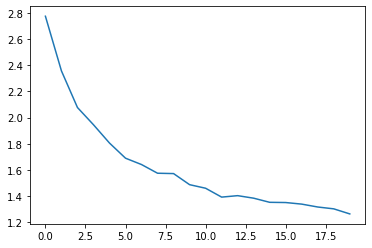

In [37]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
14
8
4
15
5
8
16
14
15
4
4
4
12
17
13
13
8
3
6
13
14
2
9
10
4
1
4
0
10
10
10
8
4
13
8
14
16
17
10
8
16
17
3
4
3
11
15
16
12
9
16
17
3
6
3
2
1
3
12
15
2
13
3
17
16
14
13
4
16
4
13
5
0
1
2
4
16
3
9
4
12
4
5
5
13
6
16
4
12
8
16
17
10
2
6
6
4
5
9
15
10
13
8
2
8
4
13
17
4
2
6
13
8
14
13
10
17
17
6
5
13
10
9
0
0
8
13
14
2
16
16
15
15
8
6
16
17
5
9
14
17
13
16
4
3
14
14
13
17
2
13
8
8
4
2
11
14
17
14
1
14
0
17
2
15
1
14
17
14
1
4
2
8
4
1
14
8
3
1
10
17
3
6
8
7
2
3
16
17
8
0
10
16
2
16
2
3
2
14
16
15
13
10
1
15
8
13
7
13
12
16
8
3
2
17
0
14
0
7
4
2
4
4
1
16
10
15
16
12
13
6
9
8
7
2
13
10
3
7
4
11
3
13
16
7
17
11
17
3
8
7
8
6
2
4
16
15
14
4
9
14
7
11
3
8
2
1
2
10
1
6
14
7
10
1
16
4
13
14
5
9
4
2
4
4
6
8
7
13
7
17
13
17
8
4
14
1
4
13
7
1
5
7
2
5
16
16
4
8
13
10
4
4
8
1
14
1
3
17
13
4
17
3
8
8
8
13
0
3
15
10
17
15
4
13
16
3
4
17
12
10
8
10
8
16
17
17
3
5
8
14
9
8
0
6
5
13
14
2
14
10
10
12
2
15
4
7
1
14
4
5
17
16
16
10
10
0
1
17
0
4
8
2
15
8
3
17
14
12
12
8
3
16

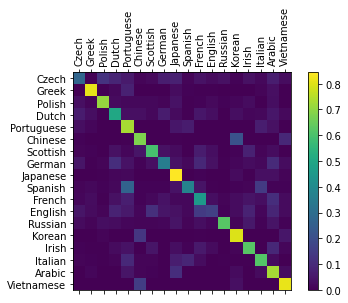

In [38]:
n_categories = len(all_categories)
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [39]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.44) Russian
(-2.00) Czech
(-2.43) Polish

> Jackson
(-0.24) Scottish
(-2.04) English
(-4.19) Dutch

> Satoshi
(-0.37) Japanese
(-2.24) Arabic
(-2.79) Italian
